In [48]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


portfolio = pd.read_json("data/portfolio.json", orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [49]:
sns.set()

In [50]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


1. Onehot encoding for "channels"
2. combine "reward", "duration", "difficulty" and "offer_type" together to create a new var


In [51]:
def onehot_encoding_channels(portfolio_df):
    channels = ['email', "mobile", "social", "web"]
    for channel in channels:
        portfolio_df[channel] = portfolio_df.channels.apply(lambda x: channel in x ) * 1
    portfolio_df = portfolio_df.drop("channels", axis = 1)
    
    return portfolio_df

def new_portfolio_name(portfolio_df):
    portfolio_df['name'] = portfolio_df.offer_type.astype(str) + "_" + portfolio_df.difficulty.astype(str) + "_"  + portfolio_df.reward.astype(str) + "_" + portfolio_df.duration.astype(str)
    return portfolio_df

def preprocessing_portfolio(portfolio_df):
    portfolio_df = onehot_encoding_channels(portfolio_df)
    portfolio_df = new_portfolio_name(portfolio_df)
    return portfolio_df


In [52]:
portfolio_clean = preprocessing_portfolio(portfolio)

In [53]:
portfolio_clean

,reward,difficulty,duration,offer_type,id,email,mobile,social,web,name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo_10_10_7
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo_10_10_5
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,informational_0_0_4
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,bogo_5_5_7
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,discount_20_5_10
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_7_3_7
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_10_2_10
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,informational_0_0_3
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo_5_5_5
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,discount_10_2_7


In [54]:
portfolio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
reward        10 non-null int64
difficulty    10 non-null int64
duration      10 non-null int64
offer_type    10 non-null object
id            10 non-null object
email         10 non-null int32
mobile        10 non-null int32
social        10 non-null int32
web           10 non-null int32
name          10 non-null object
dtypes: int32(4), int64(3), object(3)
memory usage: 768.0+ bytes


Well, there are 10 offers for portfolio

C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum +

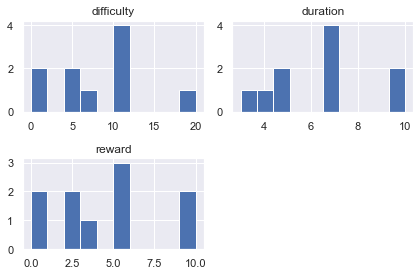

In [55]:
portfolio_clean[['reward', 'difficulty','duration']].hist()
plt.tight_layout()

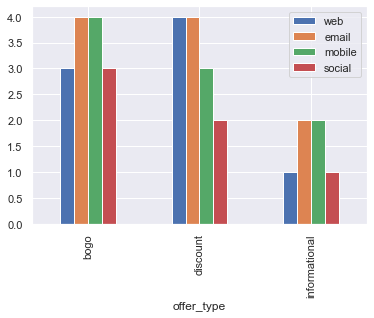

In [56]:
channels = ['web', 'email', 'mobile', 'social']
portfolio_clean.groupby('offer_type').sum()[channels].plot(kind = 'bar')

## Profile

In [57]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [58]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [59]:
profile[['age', 'income']].describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum +

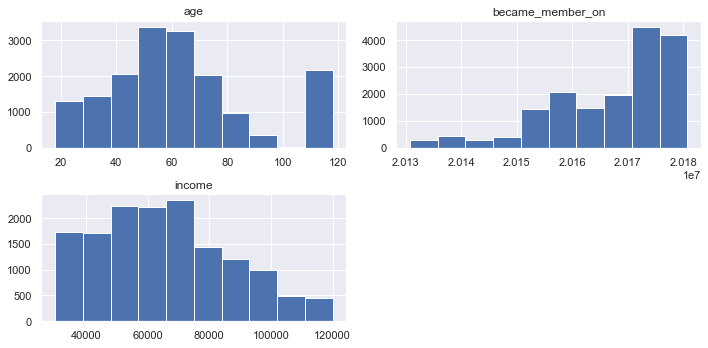

In [60]:
profile[['age','income', 'became_member_on']].hist(figsize = (10,5))
plt.tight_layout()

In [61]:
profile[profile['age'] == 118]['age'].value_counts()

118    2175
Name: age, dtype: int64

In [62]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

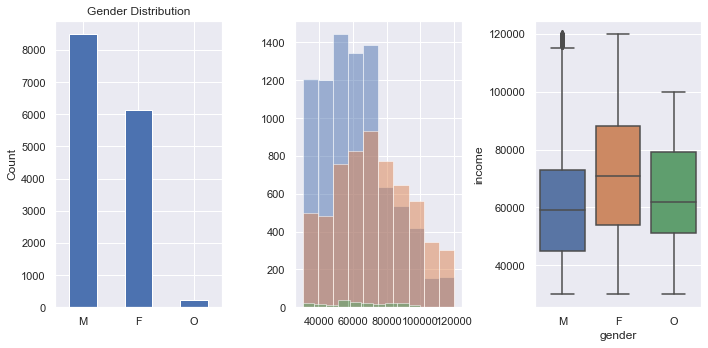

In [63]:
""" GENDER """

f, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize = (10,5))

profile.gender.value_counts().plot(kind = 'bar', ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
ax1.set_title("Gender Distribution")
ax1.set_ylabel("Count")


ax2.hist(profile[profile.gender == 'M']['income'], alpha = 0.5, label = 'M')
ax2.hist(profile[profile.gender == 'F']['income'], alpha = 0.5, label = 'F')
ax2.hist(profile[profile.gender == 'O']['income'], alpha = 0.5, label = 'O')

sns.boxplot("gender", "income",data = profile, order = ['M', 'F', 'O'] ,ax = ax3)

plt.tight_layout()


In [64]:
profile.groupby('gender').describe()['income']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6129.0,71306.412139,22338.353773,30000.0,54000.0,71000.0,88000.0,120000.0
M,8484.0,61194.601603,20069.517615,30000.0,45000.0,59000.0,73000.0,120000.0
O,212.0,63287.735849,18938.594726,30000.0,51000.0,62000.0,79250.0,100000.0


### Datetime

In [65]:
def profile_parse_dates(profile):
    profile_df = profile.copy()
    
    profile_df['became_member_on'] = profile_df.became_member_on.apply( lambda x: str(x))
    profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'])
    
    return profile_df

profile_clean = profile_parse_dates(profile)

In [66]:
profile_clean.became_member_on

0       2017-02-12
1       2017-07-15
2       2018-07-12
3       2017-05-09
4       2017-08-04
           ...    
16995   2018-06-04
16996   2018-07-13
16997   2017-01-26
16998   2016-03-07
16999   2017-07-22
Name: became_member_on, Length: 17000, dtype: datetime64[ns]

Text(0.5, 1.0, 'Distribution of became_member_on')

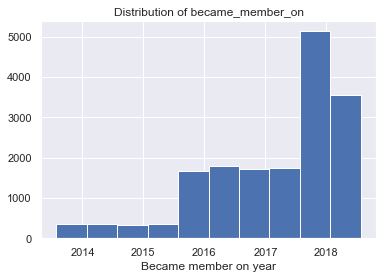

In [67]:
profile_clean.became_member_on.hist()
plt.xlabel("Became member on year")
plt.title("Distribution of became_member_on")

## Missing data

In [68]:
profile_clean.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Text(0.5, 1.0, 'Profiles with missing values')

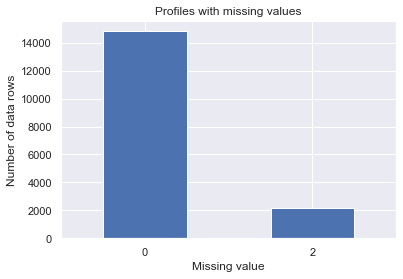

In [69]:
row_null = profile_clean.isnull().sum(axis = 1)
row_null.value_counts().plot(kind = 'bar')
plt.xlabel("Missing value")
plt.xticks(rotation = 0)
plt.ylabel("Number of data rows")
plt.title("Profiles with missing values")

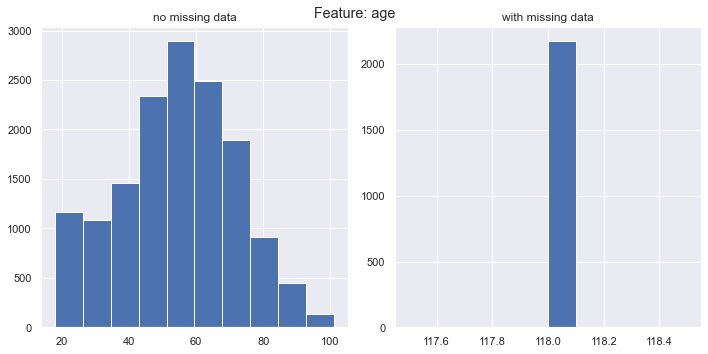

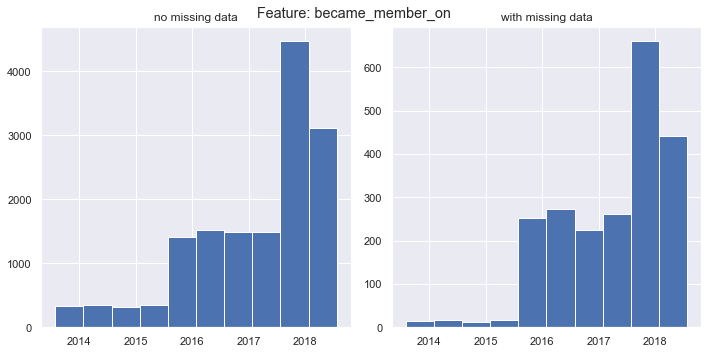

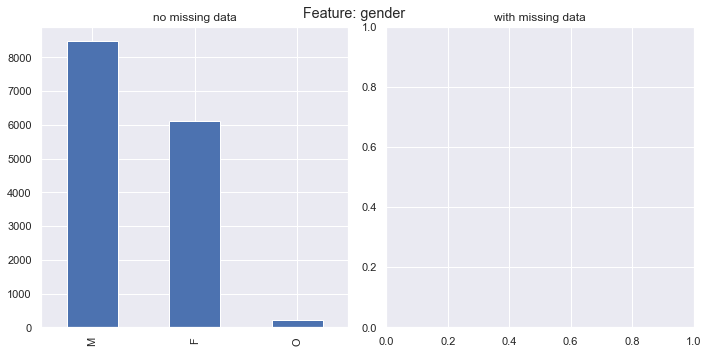

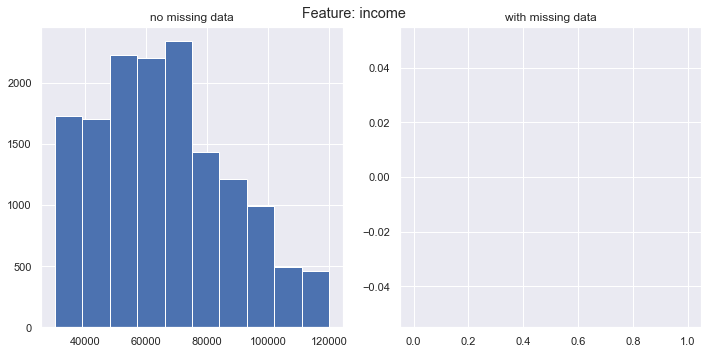

In [70]:
"""Compare data with missing values with no missing values"""
profile_null = profile_clean[row_null == 0]
profile_not = profile_clean[row_null > 0]


for col in ['age', 'became_member_on', 'gender', "income"]:
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    
    if col == 'gender':
        profile_null[col].value_counts().plot(kind = 'bar',ax = ax1)
        try:
            profile_not[col].value_counts().plot(kind = 'bar', ax = ax2)
        except:
            pass
        
    else:
        profile_null[col].hist(ax= ax1)
        profile_not[col].hist(ax = ax2)
    
    ax1.set_title("no missing data")
    ax2.set_title("with missing data")
    f.suptitle("Feature: " + col)
    f.tight_layout()




Summary:
    1. there're 2175 missing data in the total 170000 profile.
    2. The age with 118 is the abnormalities data and they're related to the missing data in income and gender data. Probably they don't want to share info with us. We will investigate them in the future.
    3. Most of customers are male, while the average income of females ($71306) are higher than males($61194) 

## Transcript

In [71]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [72]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
person    306534 non-null object
event     306534 non-null object
value     306534 non-null object
time      306534 non-null int64
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [73]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [74]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [75]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [76]:
transcript.person.nunique()

17000

all the people in profile are also avaible in transcript

### Transcript Processing 

In [77]:
def encode_offer_id(x):
    try:
        return x['offer id']
    except:
        return x['offer_id']

def transcript_encode(transcript_df):
    transcript_encoded = transcript_df.copy()
    
    transcript_encoded['offer_id'] = transcript[transcript.event.isin(['offer received', 'offer viewed', 'offer completed'])].value.apply(encode_offer_id)
    transcript_encoded['amount'] = transcript[transcript.event.isin(['transaction'])].value.apply( lambda x :x['amount'])
    '''transaction is different from the received offer, which contains amount, can be used to calculate the money'''
    return transcript_encoded

transcript_encode(transcript).head()

,person,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [78]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [79]:
def merge_transcript_profile(transcript_df, profile_df):
    profile_df = profile_parse_dates(profile_df)
    transcript_encoded_df = transcript_encode(transcript_df)
    transcript_profile_df = pd.merge(transcript_encoded_df,profile_df,  left_on = ['person'], right_on = ['id'], how = 'left')
    transcript_profile_df = transcript_profile_df.drop(['id'], axis = 1)

    
    return transcript_profile_df

def merge_transcript_profile_portfolio(transcript_df, profile_df, portfolio_df):
    portfolio_df = preprocessing_portfolio(portfolio_df)
    transcript_profile_df = merge_transcript_profile(transcript_df, profile_df)
    
    transcript_profile_porto = pd.merge(transcript_profile_df, portfolio_df, left_on = 'offer_id', right_on = 'id', how = "left" ).drop('id', axis = 1)
    
    return transcript_profile_porto

transcript_merge = merge_transcript_profile_portfolio(transcript, profile, portfolio)
transcript_merge.head()



,person,event,value,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,email,mobile,social,web,name
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,bogo_5_5_7
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,None,118,2017-08-04,NaN,5.0,20.0,10.0,discount,1.0,0.0,0.0,1.0,discount_20_5_10
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,2018-04-26,70000.0,2.0,10.0,7.0,discount,1.0,1.0,0.0,1.0,discount_10_2_7
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,None,118,2017-09-25,NaN,2.0,10.0,10.0,discount,1.0,1.0,1.0,1.0,discount_10_2_10
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,None,118,2017-10-02,NaN,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_10_10_5


## Event & Offer Dis

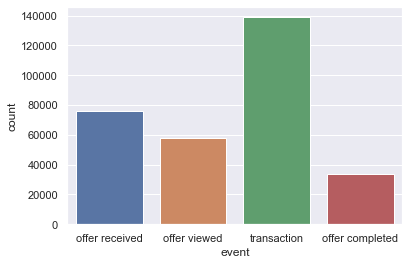

In [80]:
'''Distribution of transcript type'''
sns.countplot( x = 'event', data = transcript_merge)


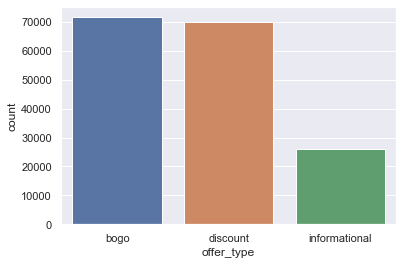

In [81]:
"""Distribution of offer type"""

sns.countplot(x = "offer_type", data= transcript_merge)

Text(0.5, 0, 'offer name')

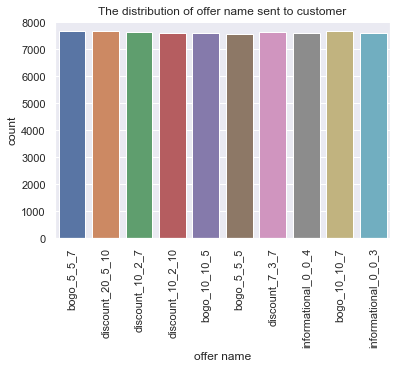

In [82]:
"""Distribution of recevived offer"""

received = transcript_merge[transcript_merge['event'] == 'offer received']

sns.countplot(received['name'])
plt.xticks(rotation = 90)
plt.title("The distribution of offer name sent to customer")
plt.xlabel("offer name")

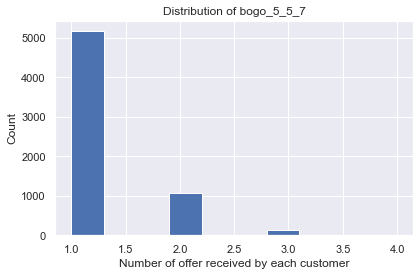

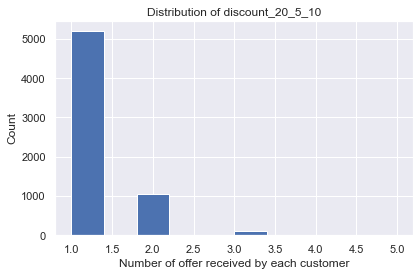

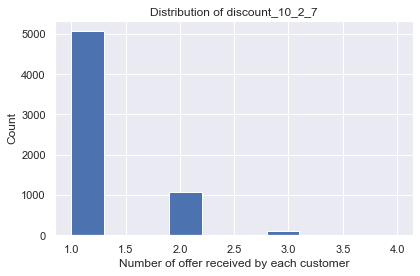

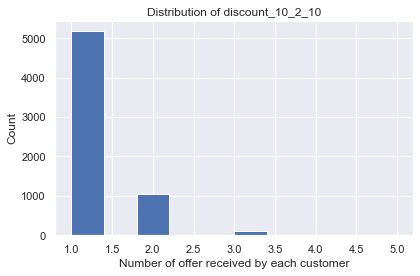

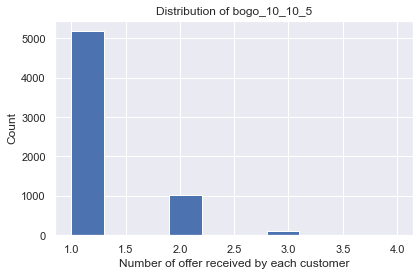

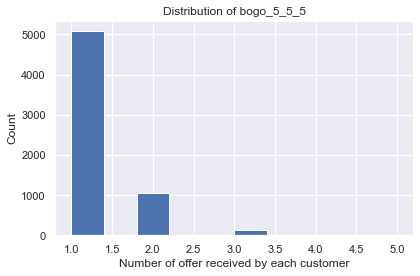

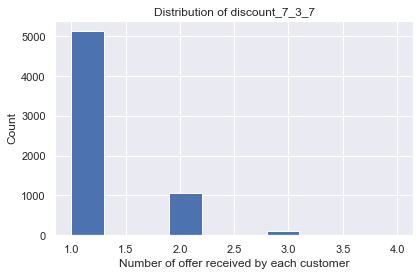

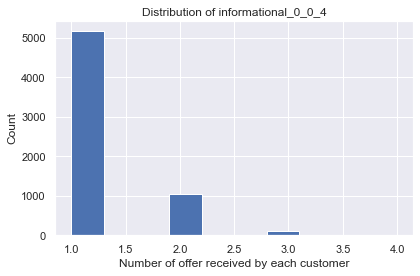

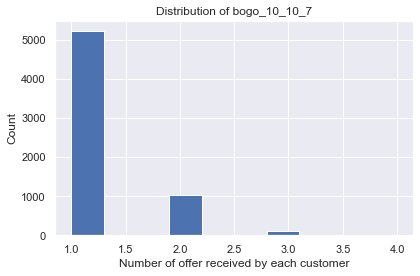

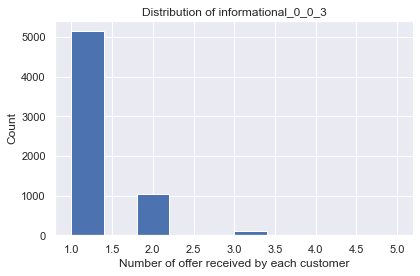

In [83]:
for offer_name in received.name.unique():
    received[received.name == offer_name]['person'].value_counts().hist()
    plt.title("Distribution of " + offer_name)
    plt.xlabel("Number of offer received by each customer")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    

From the above plots we can see that their dis are quite same, meaning that each customer will received the same offer 

### Spending and Transcript Count

count    16578.000000
mean        13.680266
std         16.056763
min          0.050000
25%          3.181392
50%         11.996607
75%         20.469643
max        451.470000
Name: amount, dtype: float64

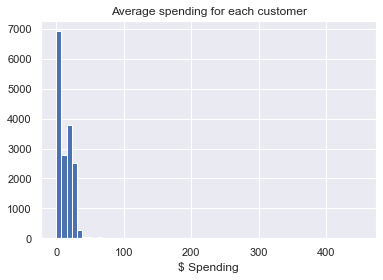

In [84]:
"""average spending distribution for each customer"""
transcript_merge.groupby('person')['amount'].mean().hist(bins = 60)
plt.xlabel("$ Spending")
plt.title("Average spending for each customer")
transcript_merge.groupby('person')['amount'].mean().describe()

count    17000.000000
mean       104.438351
std        125.922619
min          0.000000
25%         21.820000
50%         69.405000
75%        148.782500
max       1608.690000
Name: amount, dtype: float64

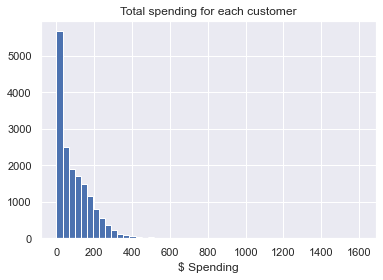

In [85]:
"""total spending distribution for each customer"""
transcript_merge.groupby('person')['amount'].sum().hist(bins = 50)
plt.xlabel("$ Spending")
plt.title("Total spending for each customer")
transcript_merge.groupby('person')['amount'].sum().describe()

count    17000.000000
mean         8.173706
std          5.116250
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         36.000000
Name: amount, dtype: float64

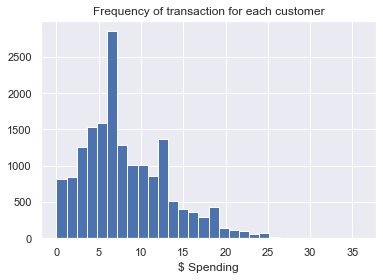

In [86]:
transcript_merge.groupby('person')['amount'].count().hist(bins = 30)
plt.xlabel("$ Spending")
plt.title("Frequency of transaction for each customer")
transcript_merge.groupby('person')['amount'].count().describe()

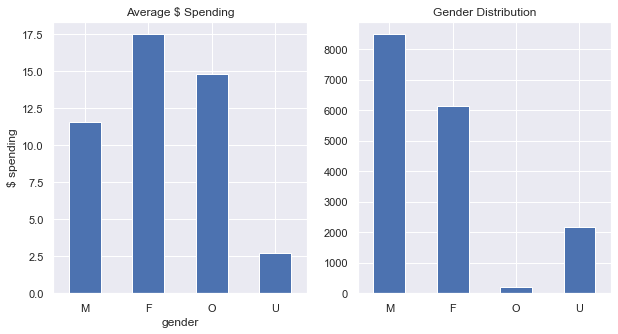

In [87]:
"""Average spending by Gender"""

transcript_merge_ = transcript_merge.copy()
transcript_merge_.loc[transcript_merge.gender.isnull(), "gender"] = "U"
## assign missing value in gender with 'U' value


f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

transcript_merge_.groupby("gender")['amount'].mean()[['M','F','O','U']].plot(kind = 'bar', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylabel("$ spending")
ax1.set_title("Average $ Spending")



profile.fillna("U").gender.value_counts()[['M','F','O','U']].plot(kind = 'bar', ax =ax2)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2.set_title("Gender Distribution")
ax1.set_label("Gender")

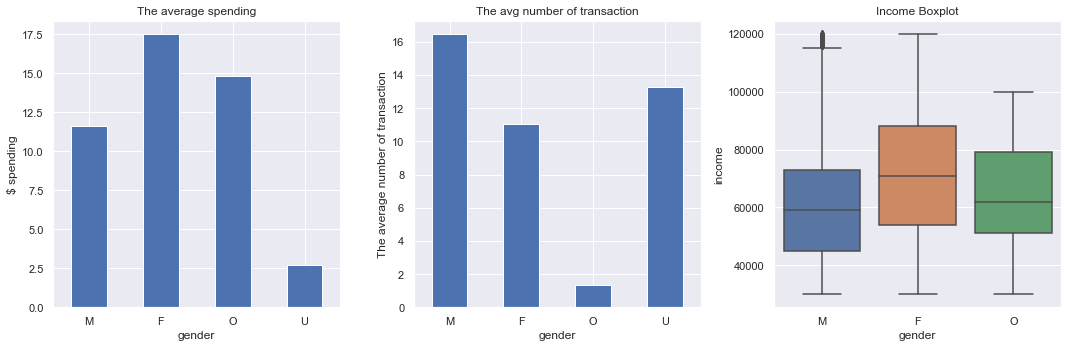

In [88]:
""" The number of transaction by GENDER """
sns.set()
#plot avg spending
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
transcript_merge_.groupby('gender')['amount'].mean()[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax1);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylabel("$ spending")
ax1.set_title('The average spending')

# plot avg number of transaction

transcript_merge_.groupby(['gender', 'amount'])['amount'].count().mean(level=0)[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax2);
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=0);
ax2.set_ylabel("The average number of transaction");
ax2.set_title("The avg number of transaction");

# boxplot income distribution
sns.boxplot('gender', 'income', data=profile, ax=ax3, order=['M', 'F', 'O'])
ax3.set_title('Income Boxplot')

plt.tight_layout()

    1. The highest average spending is made by female while the second is made by "O", even through they just made few number of transaction
    2. The average spending is correlated with the income
    3. The unknown "U" has the lowest average spending, yet it has the pretty high number of transaction

### Office received, viewed and completed


Text(0.5, 1.0, 'Portfolio Distribution by Event')

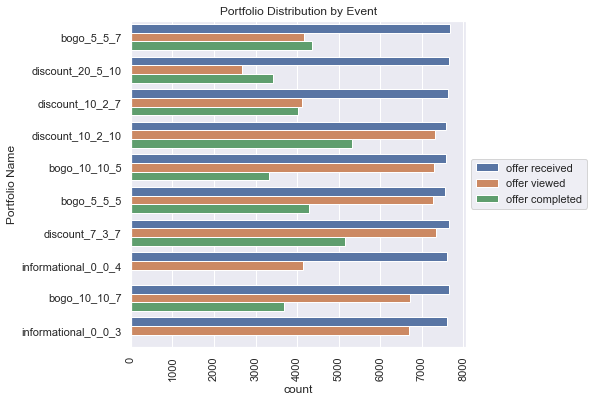

In [89]:
"""Portfolio distribution by event"""
plt.figure(figsize=( 6,6))

sns.countplot(y = 'name', hue = 'event', data = transcript_merge[~transcript_merge.event.isin(['transaction'])])
plt.legend(loc = 'center left',bbox_to_anchor = (1,0.5) )
plt.xticks(rotation =90)
plt.ylabel("Portfolio Name")
plt.title("Portfolio Distribution by Event")

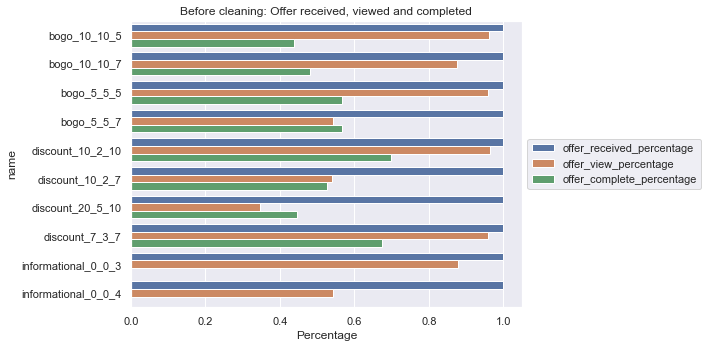

In [90]:
"""Portfolio distribution in percentage%"""

event_count = transcript_merge[~transcript_merge.event.isin(['transaction'])].groupby(['name','event']).size().unstack()


event_count['offer_complete_percentage'] = event_count['offer completed'] / event_count['offer received']
event_count['offer_received_percentage'] = event_count['offer received'] / event_count['offer received']
event_count['offer_view_percentage'] = event_count['offer viewed'] / event_count['offer received']

event_count_percent = event_count[['offer_received_percentage','offer_view_percentage','offer_complete_percentage']]
event_count_percent = event_count_percent.stack().reset_index()


plt.figure(figsize = (10,5))
sns.barplot( x = 0,y = 'name', hue = 'event', data = event_count_percent)
plt.legend(loc = 'center left',bbox_to_anchor = (1,0.5) )
plt.xlabel("Percentage")
plt.title("Before cleaning: Offer received, viewed and completed")
plt.tight_layout()

In [91]:
transcript_merge['person'].value_counts().head()



94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
79d9d4f86aca4bed9290350fb43817c2    48
Name: person, dtype: int64

In [92]:
transcript_merge[transcript_merge['person'] =='94de646f7b6041228ca7dec82adb97d2'].head(10)

,person,event,value,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,email,mobile,social,web,name
2276,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,M,27,2014-01-26,33000.0,5.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_5_5_5
16010,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},6,f19421c1d4aa40978ebb69ca19b0e20d,NaN,M,27,2014-01-26,33000.0,5.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_5_5_5
24531,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 7.41},30,NaN,7.41,M,27,2014-01-26,33000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24532,94de646f7b6041228ca7dec82adb97d2,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,30,f19421c1d4aa40978ebb69ca19b0e20d,NaN,M,27,2014-01-26,33000.0,5.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_5_5_5
42252,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 1.47},102,NaN,1.47,M,27,2014-01-26,33000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55475,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},168,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,M,27,2014-01-26,33000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,bogo_5_5_7
75256,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},186,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,M,27,2014-01-26,33000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,bogo_5_5_7
77624,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 2.62},192,NaN,2.62,M,27,2014-01-26,33000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81725,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 0.59},204,NaN,0.59,M,27,2014-01-26,33000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93913,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 2.2800000000000002},246,NaN,2.28,M,27,2014-01-26,33000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
%load_ext autoreload
%autoreload 2
import helper as h

# re-read read in the json files
portfolio = pd.read_json("data/portfolio.json", orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
# def find_invalid_index(transcript_df, profile_df, portfolio_df):
    
#     transcript_merge_df = merge_transcript_profile_portfolio(transcript_df, profile_df, portfolio_df)
#     invalid_index = []
    
#     for profile_id in tqdm(transcript_merge_df.person.unique()):
#         subset_df = transcript_merge_df[transcript_merge_df.person == profile_id]
        
#         complete_df = subset_df[subset_df.event == 'offer completed']
        
#         for offer in complete_df.offer_id.unique():
#             comp = complete_df[complete_df.offer_id == offer]
            
#             start_time = comp.time.values - (comp.duration.values * 24)
            
#             comp_time = comp.time.values
            
#             subset = subset_df[(subset_df.time >= start_time[0]) & (subset_df.time <= comp.time.values[0])]
            
#             subset_viewed = subset[(subset.event == 'offer viewed') & ( subset.offer_id == offer)]
#             if subset_viewed.shape[0] == 0 :
#                 invalid_index.extend(comp.index)

#     return invalid_index
        

In [95]:
# def transcript_cleaning(transcript_df, profile_df, portfolio_df):
    
    
#     transcript_clean_df = merge_transcript_profile_portfolio(transcript_df, profile_df, portfolio_df)
#     invalid_index = find_invalid_index(transcript_df, profile_df, portfolio_df) 
    
#     transcript_clean_df.loc[transcript_clean_df.index.isin(invalid_index),"invalid"] = 1
#     transcript_clean_df.loc[~transcript_clean_df.index.isin(invalid_index),"invalid"] = 0    
    
#     return transcript_clean_df

In [96]:
# def transcript_preprocessing(transcript_df, profile_df, portfolio_df):
#     transcript_all_df = transcript_cleaning(transcript_df, profile_df, portfolio_df)
#     transcript_valid_df = transcript_all_df[transcript_all_df.invalid == 0]
#     return transcript_valid_df, transcript_all_df

In [97]:
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)


100%|██████████| 17000/17000 [07:41<00:00, 36.87it/s]


### Visualize Offer Received, Viewed, Completed

In [98]:
event_count = transcript_clean.groupby(['name', 'offer_type', 'event']).size().unstack()

event_count['offer_received_frac'] = event_count['offer received']/ event_count['offer received']
event_count['offer_viewed_frac'] = event_count['offer viewed']/ event_count['offer received']
event_count['offer_completed_frac'] =  event_count['offer completed']/ event_count['offer received']

event_count_frac = event_count[['offer_received_frac','offer_viewed_frac', 'offer_completed_frac']]
event_count_frac.reset_index()

event,name,offer_type,offer_received_frac,offer_viewed_frac,offer_completed_frac
0,bogo_10_10_5,bogo,1.0,0.961148,0.369946
1,bogo_10_10_7,bogo,1.0,0.876991,0.352964
2,bogo_5_5_5,bogo,1.0,0.959451,0.471536
3,bogo_5_5_7,bogo,1.0,0.543311,0.287091
4,discount_10_2_10,discount,1.0,0.964460,0.623404
5,discount_10_2_7,discount,1.0,0.539570,0.288391
6,discount_20_5_10,discount,1.0,0.347287,0.184924
7,discount_7_3_7,discount,1.0,0.959587,0.583442
8,informational_0_0_3,informational,1.0,0.877789,NaN
9,informational_0_0_4,informational,1.0,0.544046,NaN


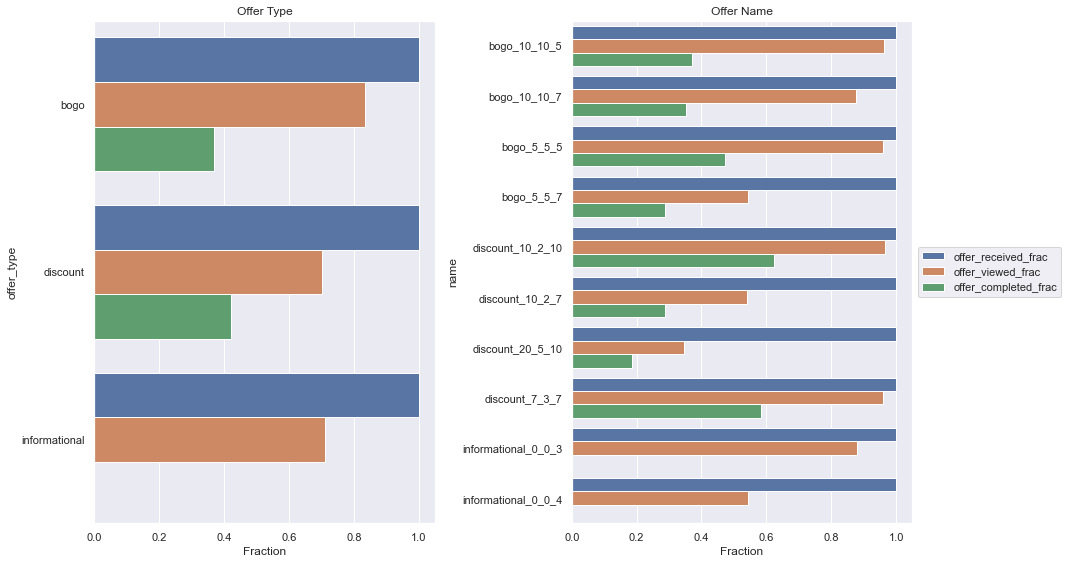

In [105]:
event_count_stack = event_count_frac.stack().reset_index()
f, (ax1, ax2) = plt.subplots(1 ,2, figsize = (15,8))

sns.barplot( x = 0, y = 'offer_type',hue = 'event' ,data = event_count_stack, ci = None, ax = ax1)
ax1.legend().set_visible(False)
ax1.set_title("Offer Type")
ax1.set_xlabel("Fraction")

sns.barplot( x = 0, y = 'name',hue = 'event' ,data = event_count_stack, ax = ax2)
ax2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
ax2.set_title("Offer Name")
ax2.set_xlabel('Fraction')

plt.tight_layout()

- The highest offer viewed rate is discount-7-3-7, followed by discount-10-2-10
- The highest completed offer rate is discount 10-2-10, followed by discount-7-3-7
- The highest viewed rate is bogo while highest completed rate is discount


In [106]:
profile_updated = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)


100%|██████████| 17000/17000 [07:46<00:00, 36.47it/s]


In [108]:
profile_updated.head()

,gender,age,became_member_on,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,...,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio
68be06ca386d4c31939f3a4f0e3dd783,None,118,2017-02-12,NaN,0.0,0.0,0.0,0.0,1.0,1.0,...,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.285714
0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
38fe809add3b4fcf9315a9694bb96ff5,None,118,2018-07-12,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000
78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333
a03223e636434f42ac4c3df47e8bac43,None,118,2017-08-04,NaN,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000


In [109]:
profile_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 68be06ca386d4c31939f3a4f0e3dd783 to e4052622e5ba45a8b96b59aba68cf068
Data columns (total 92 columns):
gender                                            14825 non-null object
age                                               17000 non-null int64
became_member_on                                  17000 non-null datetime64[ns]
income                                            14825 non-null float64
offer received_bogo_10_10_7                       17000 non-null float64
offer received_bogo_10_10_5                       17000 non-null float64
offer received_informational_0_0_4                17000 non-null float64
offer received_bogo_5_5_7                         17000 non-null float64
offer received_discount_20_5_10                   17000 non-null float64
offer received_discount_7_3_7                     17000 non-null float64
offer received_discount_10_2_10                   17000 non-null float64
offer received_informational_0_